In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.datasets import mnist
from tensorflow.keras.layers import Layer
import matplotlib.pyplot as plt
from tensorflow.keras.losses import Loss

In [ ]:
class SimpleQuadratic(Layer):
  
    def __init__(self,units=32, activation=None):
      super(SimpleQuadratic, self).__init__()
      self.units=units
      self.activation=tf.keras.activations.get(activation)
    def build(self,input_shape):
      a = tf.random_normal_initializer()
      self.a=tf.Variable(name="kernel",initial_value=a(shape=(input_shape[-1], self.units),dtype='float32'),trainable=True)  
      b=tf.random_normal_initializer()
      self.b=tf.Variable(name='kernel',initial_value=b(shape=(input_shape[-1], self.units),dtype='float32'),trainable=True)
      c=tf.random_normal_initializer()
      self.c = tf.Variable(name="bias",initial_value=c(shape=(self.units,), dtype='float32'),trainable=True)
    def call(self, inputs):
       return self.activation(tf.matmul(tf.math.square(inputs),self.a)+tf.matmul(inputs,self.b)+self.c)

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape()
x_train=tf.expand_dims(x_train,axis=-1)
x_test=tf.expand_dims(x_test,axis=-1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(28, 28,1),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(28, 28,1),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    SimpleQuadratic(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))


Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1661 - accuracy: 0.9491 - val_loss: 0.0474 - val_accuracy: 0.9845
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0595 - accuracy: 0.9816 - val_loss: 0.0356 - val_accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0442 - accuracy: 0.9857 - val_loss: 0.0336 - val_accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0274 - val_accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.0346 - val_accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0263 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0296 -

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 400)               0         
_________________________________________________________________
simple_quadratic_10 (SimpleQ (None, 128)               102528    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)             

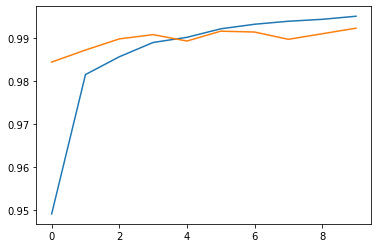

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

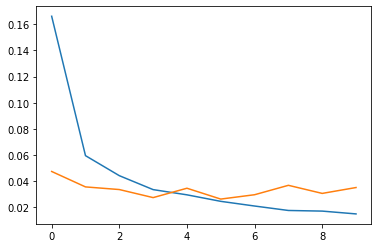

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
history=model.fit(x_train, y_train, epochs=4,validation_data=(x_test,y_test))

Epoch 1/4
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.0357 - val_accuracy: 0.9914
Epoch 2/4
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0269 - val_accuracy: 0.9935
Epoch 3/4
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0295 - val_accuracy: 0.9919
Epoch 4/4
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0302 - val_accuracy: 0.9931
